# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

# Conclusions

####  1. The correlation between temperature and distance from the equator (i.e., positive and negative latitudes) is very strong

The correlation coefficient r value is consistently above .8. This supports the assertion that city climates get warmer as you get closer to the equator.

All other weather conditions (humidity, cloudiness and wind speed) have negligible correlations (r < .2). 

#### 2. By hemisphere, temperature is still the only weather variable with a strong correlation to latitude

Though in some random samples, correlation may be strong in the Southern Hemisphere (correlation coefficient r value between .6 and .8) while it remains very strong (r > .8) in the Northern Hemisphere. 

#### 3. By hemisphere, looking at random samples, correlations tend to be a little stronger in one hemisphere than the other.

For example, for the latest random sample that this notebook produced, the correlation between humidity, cloudiness and wind speed was low (correlation coefficient r value between .2 and .4) in the Southern Hemisphere, while it was negligible (r < .2) in the Northern Hemisphere. 


In [1]:
import matplotlib.pyplot as plt                          # Dependencies and Setup
import pandas as pd
import numpy as np
import requests, json
from datetime import datetime
from scipy import stats
import random
from citipy import citipy 

from config import api_key                               # Import API key

#from jupyterthemes import jtplot
#jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

output_data_file = "output_data/cities_weather_data.csv" # Output File (CSV)

pd.options.display.float_format = '{:,.2f}'.format       # Some basic formatting for dataframes

## Generate Cities List

In [2]:
# Generate random coordinates and list of corresponding cities

cities = []                                                # Create empty list for cities
countries = []                                             # and countries

for i in range(1, 1100):                                   # Note that I limit the latitude range a little.
    lat_coord  = round(random.uniform(-60,75), 2)          # Antarctica and deep arctic aren't very useful and                     
    long_coord = round(random.uniform(-180, 180), 2)       # skew the results with overepresented cities in 
                                                           # far north and south
    city = citipy.nearest_city(lat_coord, long_coord)      # Use Citipy to get name of city nearest the randomly
                                                           # chosen coordinates
    if city.city_name.title() not in cities:               # Add unique cities to list of cities
        cities.append(city.city_name.title()) 
        countries.append(city.country_code.upper())        # and grab their country codes too

print(f"Number of cities in list: {len(cities)}")          # Print the city count to confirm sufficient count


Number of cities in list: 590


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Get weather data from OpenWeather API

url = "http://api.openweathermap.org/data/2.5/weather?"        # Base url for OW
units = "metric"                                               # Set units to request

query_url = f"{url}appid={api_key}&units={units}&q="           # Build the query URL

lats = []                                                      # Set up lists to hold reponse info
longs = []
temps = []
humids = []
cloudies = []
wind_speeds = []
dates = []

i = 1                                                          # Start a counter so that the print includes count

for city in cities:                                            # Loop through the list of cities 
                                                               # and perform a request for data on each
    response = requests.get(query_url + city).json()           # Get response and convert to json

    try:
        lat = response['coord']['lat']                         # Not all cities found in Citipy have data in 
        lng = response['coord']['lon']                        # OpenWeather. So this 'try' block will look for 
        temp = round(response['main']['temp_max'])                 # the data and set the respective variables...
        humid = response['main']['humidity']                    
        cloud = response['clouds']['all']
        wind = response['wind']['speed']
        date = datetime.fromtimestamp(response['dt']).strftime('%d/%m/%y')  # Converts and formats timestamps
    
    except KeyError:                                           # ...And this 'except' block will set variables to 
        lat = np.nan                                           # np.nan for those cities that lack data. That way the
        lng = np.nan                                           # program won't blow up and later it will be easy to 
        temp = np.nan                                          # drop rows with missing data.                                           
        humid = np.nan                                           
        cloud = np.nan
        wind = np.nan
        date = np.nan
    
    lats.append(lat)                                           # Append data to respective lists
    longs.append(lng)
    temps.append(temp)
    humids.append(humid)
    cloudies.append(cloud)
    wind_speeds.append(wind)
    dates.append(date)
    
    # Print the data being processed
    print (f"{i}: {city} lat: {lat}, lng: {lng}, temp: {temp}, humidity: {humid}, cloudiness: {cloud}, wind speed: {wind}")
    i+=1

1: Kalemie lat: -5.9475, lng: 29.1947, temp: 21, humidity: 86, cloudiness: 100, wind speed: 0.14
2: Olafsvik lat: 64.8945, lng: -23.7142, temp: 5, humidity: 77, cloudiness: 83, wind speed: 1.7
3: Nanortalik lat: 60.1432, lng: -45.2371, temp: 3, humidity: 84, cloudiness: 10, wind speed: 4
4: Sangueya lat: 10.7, lng: -14.3667, temp: 23, humidity: 83, cloudiness: 91, wind speed: 1
5: Mar Del Plata lat: -38.0023, lng: -57.5575, temp: 17, humidity: 82, cloudiness: 0, wind speed: 5.14
6: Thompson lat: 55.7435, lng: -97.8558, temp: -1, humidity: 47, cloudiness: 40, wind speed: 3.09
7: Saldanha lat: -33.0117, lng: 17.9442, temp: 11, humidity: 82, cloudiness: 0, wind speed: 3.6
8: Bethel lat: 41.3712, lng: -73.414, temp: 21, humidity: 73, cloudiness: 90, wind speed: 5.14
9: Domodossola lat: 46.1165, lng: 8.2931, temp: 11, humidity: 95, cloudiness: 100, wind speed: 0.78
10: Hilo lat: 19.7297, lng: -155.09, temp: 28, humidity: 57, cloudiness: 20, wind speed: 4.12
11: Satitoa lat: nan, lng: nan, t

86: Dunedin lat: -45.8742, lng: 170.5036, temp: 13, humidity: 71, cloudiness: 81, wind speed: 5.81
87: Ereymentau lat: 51.6199, lng: 73.1033, temp: 9, humidity: 44, cloudiness: 91, wind speed: 3.15
88: Anzio lat: 41.4853, lng: 12.6179, temp: 16, humidity: 97, cloudiness: 87, wind speed: 0.89
89: Portland lat: 45.5234, lng: -122.6762, temp: 23, humidity: 40, cloudiness: 75, wind speed: 5.66
90: Kuandian lat: 40.7286, lng: 124.7847, temp: 9, humidity: 75, cloudiness: 99, wind speed: 3.13
91: Ostrovnoy lat: 68.0531, lng: 39.5131, temp: -3, humidity: 88, cloudiness: 100, wind speed: 7.98
92: Dariba lat: 24.95, lng: 74.1333, temp: 25, humidity: 38, cloudiness: 40, wind speed: 1.54
93: Taolanaro lat: nan, lng: nan, temp: nan, humidity: nan, cloudiness: nan, wind speed: nan
94: Lebu lat: -37.6167, lng: -73.65, temp: 13, humidity: 95, cloudiness: 100, wind speed: 3.58
95: Severo-Kurilsk lat: 50.6789, lng: 156.125, temp: 5, humidity: 76, cloudiness: 19, wind speed: 3.26
96: Vissenbjerg lat: 55.

170: Tagbac lat: 7.089, lng: 125.1567, temp: 31, humidity: 66, cloudiness: 40, wind speed: 2.06
171: Castro lat: -24.7911, lng: -50.0119, temp: 9, humidity: 98, cloudiness: 7, wind speed: 1.97
172: Ust-Nera lat: 64.5667, lng: 143.2, temp: 3, humidity: 98, cloudiness: 99, wind speed: 0.8
173: Torbay lat: 47.6666, lng: -52.7314, temp: 3, humidity: 81, cloudiness: 1, wind speed: 4.12
174: Geraldton lat: -28.7667, lng: 114.6, temp: 22, humidity: 53, cloudiness: 90, wind speed: 7.72
175: Walvis Bay lat: -22.9575, lng: 14.5053, temp: 10, humidity: 81, cloudiness: 0, wind speed: 3.09
176: Victoria lat: 22.2855, lng: 114.1577, temp: 27, humidity: 70, cloudiness: 100, wind speed: 1.76
177: Homer lat: 59.6425, lng: -151.5483, temp: 7, humidity: 81, cloudiness: 75, wind speed: 3.6
178: Palmer lat: 42.1584, lng: -72.3287, temp: 13, humidity: 100, cloudiness: 90, wind speed: 3.6
179: Bira lat: 49, lng: 132.4667, temp: 12, humidity: 46, cloudiness: 100, wind speed: 3.18
180: Nouadhibou lat: 20.931, 

254: Nagaur lat: 27.2, lng: 73.7333, temp: 33, humidity: 22, cloudiness: 84, wind speed: 4.6
255: Scottsdale lat: 33.5092, lng: -111.899, temp: 32, humidity: 12, cloudiness: 1, wind speed: 2.06
256: Skagen lat: 57.7209, lng: 10.5839, temp: 6, humidity: 66, cloudiness: 98, wind speed: 5.36
257: Ahipara lat: -35.1667, lng: 173.1667, temp: 18, humidity: 66, cloudiness: 16, wind speed: 3.62
258: Jackson lat: 42.4165, lng: -122.8345, temp: 28, humidity: 17, cloudiness: 1, wind speed: 5.66
259: Ati lat: 13.2154, lng: 18.3353, temp: 26, humidity: 9, cloudiness: 23, wind speed: 2.46
260: Barinitas lat: 8.7622, lng: -70.4111, temp: 24, humidity: 100, cloudiness: 100, wind speed: 0.51
261: Sambava lat: -14.2667, lng: 50.1667, temp: 24, humidity: 86, cloudiness: 9, wind speed: 4.2
262: Almunecar lat: 36.7339, lng: -3.6907, temp: 17, humidity: 60, cloudiness: 1, wind speed: 2.24
263: Batticaloa lat: 7.7102, lng: 81.6924, temp: 29, humidity: 68, cloudiness: 89, wind speed: 2.08
264: Bairiki lat: 1.

337: Altamont lat: 42.2068, lng: -121.7372, temp: 24, humidity: 22, cloudiness: 1, wind speed: 5.66
338: Tecoanapa lat: 16.5167, lng: -98.75, temp: 27, humidity: 75, cloudiness: 92, wind speed: 2.64
339: Hami lat: 42.8, lng: 93.45, temp: 26, humidity: 12, cloudiness: 2, wind speed: 2.34
340: Guatire lat: 10.4762, lng: -66.5427, temp: 24, humidity: 88, cloudiness: 40, wind speed: 0.51
341: Siolim lat: nan, lng: nan, temp: nan, humidity: nan, cloudiness: nan, wind speed: nan
342: Viligili lat: nan, lng: nan, temp: nan, humidity: nan, cloudiness: nan, wind speed: nan
343: Avarua lat: -21.2078, lng: -159.775, temp: 28, humidity: 83, cloudiness: 20, wind speed: 4.12
344: Gigmoto lat: 13.7796, lng: 124.39, temp: 29, humidity: 64, cloudiness: 90, wind speed: 1.15
345: Tianpeng lat: 30.9866, lng: 103.9393, temp: 26, humidity: 1, cloudiness: 0, wind speed: 1.75
346: San Carlos De Bariloche lat: -41.1456, lng: -71.3082, temp: 10, humidity: 66, cloudiness: 0, wind speed: 5.14
347: Vostok lat: 46.

422: Yarensk lat: 62.1675, lng: 49.0916, temp: 1, humidity: 67, cloudiness: 93, wind speed: 3.13
423: Tuchola lat: 53.5879, lng: 17.8591, temp: 8, humidity: 93, cloudiness: 12, wind speed: 3.51
424: Rexburg lat: 43.826, lng: -111.7897, temp: 21, humidity: 23, cloudiness: 1, wind speed: 4.12
425: Coquimbo lat: -29.9533, lng: -71.3436, temp: 13, humidity: 88, cloudiness: 0, wind speed: 2.06
426: Patiya lat: 22.2931, lng: 91.9762, temp: 29, humidity: 84, cloudiness: 20, wind speed: 3.6
427: Marathon lat: 44.9, lng: -89.7668, temp: 12, humidity: 50, cloudiness: 20, wind speed: 3.08
428: General Pico lat: -35.6566, lng: -63.7568, temp: 14, humidity: 65, cloudiness: 0, wind speed: 4.94
429: Peterhead lat: 57.5058, lng: -1.7981, temp: 4, humidity: 93, cloudiness: 10, wind speed: 3.09
430: Dubbo lat: -32.25, lng: 148.6167, temp: 22, humidity: 46, cloudiness: 0, wind speed: 2.06
431: Roma lat: 43.2128, lng: -75.4557, temp: 12, humidity: 94, cloudiness: 90, wind speed: 2.57
432: Kamenskoye lat: 

506: Tuxpan lat: 19.55, lng: -103.4, temp: 17, humidity: 89, cloudiness: 7, wind speed: 1.63
507: Marti lat: 22.9475, lng: -80.9203, temp: 25, humidity: 61, cloudiness: 75, wind speed: 2.06
508: Salalah lat: 17.0151, lng: 54.0924, temp: 28, humidity: 83, cloudiness: 75, wind speed: 2.57
509: Zhezkazgan lat: 47.8043, lng: 67.7144, temp: 12, humidity: 42, cloudiness: 100, wind speed: 7.4
510: Yanam lat: 16.7333, lng: 82.2167, temp: 29, humidity: 79, cloudiness: 20, wind speed: 2.06
511: Stornoway lat: 58.2093, lng: -6.3865, temp: 5, humidity: 81, cloudiness: 75, wind speed: 5.14
512: Monywa lat: 22.1167, lng: 95.1333, temp: 33, humidity: 42, cloudiness: 1, wind speed: 3.64
513: Fort Saint John lat: nan, lng: nan, temp: nan, humidity: nan, cloudiness: nan, wind speed: nan
514: Puerto Del Rosario lat: 28.5004, lng: -13.8627, temp: 19, humidity: 72, cloudiness: 0, wind speed: 1.54
515: Mercedes lat: -34.6515, lng: -59.4307, temp: 14, humidity: 91, cloudiness: 0, wind speed: 3.41
516: Tsihom

590: Colares lat: 38.7992, lng: -9.4469, temp: 13, humidity: 73, cloudiness: 99, wind speed: 4.02


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
#Build a new data frame with with weather data

weather_data_df = pd.DataFrame({"City" : cities,                                # Build the dataframe
                                "Country Code" : countries,
                                "Latitude": lats,
                                "Degrees From Equator": list(map(abs, lats)),   # The intention of the 'Degrees from 
                                "Longitude" : longs,                            # Equator' column isto establish an
                                "Temperature" : temps,                          # absolute value of the latitude, or 
                                "Humidity" : humids,                            # basically the distance from equator
                                "Cloudiness" : cloudies,                        # This will come in handy later for
                                "Wind Speed" : wind_speeds,                     # plotting 
                                "Date" : dates
                              })                          

count1 = len(weather_data_df)                                                   # Count cities in dataframe  
print(f"Number of cities in dataframe: {count1}")                               # Print count 
weather_data_df.head()                                                          # Show the head sample 


Number of cities in dataframe: 590


,City,Country Code,Latitude,Degrees From Equator,Longitude,Temperature,Humidity,Cloudiness,Wind Speed,Date
0,Kalemie,CD,-5.95,5.95,29.19,21.00,86.00,100.00,0.14,29/04/21
1,Olafsvik,IS,64.89,64.89,-23.71,5.00,77.00,83.00,1.70,29/04/21
2,Nanortalik,GL,60.14,60.14,-45.24,3.00,84.00,10.00,4.00,29/04/21
3,Sangueya,GN,10.70,10.70,-14.37,23.00,83.00,91.00,1.00,29/04/21
4,Mar Del Plata,AR,-38.00,38.00,-57.56,17.00,82.00,0.00,5.14,29/04/21


In [5]:
# Remove cities with missing weather data from dataframe and save the data in a .csv file

clean_weather_data_df= weather_data_df.dropna(how='any')          # Use .dropna() to remove rows with missing data


clean_weather_data_df.to_csv(output_data_file, index=False)       # Save the dataframe above to .csv file

count2 = len(clean_weather_data_df)                               # Get a new city count
print(f"{count1 - count2} cities were removed. Number of cities in cleaned dataframe: {count2}") #Print the updated count
clean_weather_data_df.head()                                      # Show the head sample 

42 cities were removed. Number of cities in cleaned dataframe: 548


,City,Country Code,Latitude,Degrees From Equator,Longitude,Temperature,Humidity,Cloudiness,Wind Speed,Date
0,Kalemie,CD,-5.95,5.95,29.19,21.00,86.00,100.00,0.14,29/04/21
1,Olafsvik,IS,64.89,64.89,-23.71,5.00,77.00,83.00,1.70,29/04/21
2,Nanortalik,GL,60.14,60.14,-45.24,3.00,84.00,10.00,4.00,29/04/21
3,Sangueya,GN,10.70,10.70,-14.37,23.00,83.00,91.00,1.00,29/04/21
4,Mar Del Plata,AR,-38.00,38.00,-57.56,17.00,82.00,0.00,5.14,29/04/21


In [6]:
# Perform statistical check

weather_data_df.describe()

,Latitude,Degrees From Equator,Longitude,Temperature,Humidity,Cloudiness,Wind Speed
count,548.00,548.00,548.00,548.00,548.00,548.00,548.00
mean,18.12,31.36,14.29,17.50,69.91,51.01,3.08
std,32.22,19.55,89.43,9.84,22.64,39.70,2.01
min,-54.80,0.08,-175.20,-12.00,1.00,0.00,0.14
25%,-8.68,14.29,-60.71,9.75,59.00,10.00,1.54
50%,19.83,30.58,18.38,20.00,75.00,49.00,2.57
75%,45.85,46.41,91.45,25.00,87.00,91.00,4.12
max,73.51,73.51,179.32,36.00,100.00,100.00,13.00


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
#  Get the indices of cities that have humidity over 100%.

outliers = clean_weather_data_df.loc[weather_data_df['Humidity'] > 100]
outliers

,City,Country Code,Latitude,Degrees From Equator,Longitude,Temperature,Humidity,Cloudiness,Wind Speed,Date


In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.

clean_weather_data_df = weather_data_df.loc[weather_data_df['Humidity'] <= 100]
clean_weather_data_df.head()

,City,Country Code,Latitude,Degrees From Equator,Longitude,Temperature,Humidity,Cloudiness,Wind Speed,Date
0,Kalemie,CD,-5.95,5.95,29.19,21.00,86.00,100.00,0.14,29/04/21
1,Olafsvik,IS,64.89,64.89,-23.71,5.00,77.00,83.00,1.70,29/04/21
2,Nanortalik,GL,60.14,60.14,-45.24,3.00,84.00,10.00,4.00,29/04/21
3,Sangueya,GN,10.70,10.70,-14.37,23.00,83.00,91.00,1.00,29/04/21
4,Mar Del Plata,AR,-38.00,38.00,-57.56,17.00,82.00,0.00,5.14,29/04/21


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [9]:
# Set up some basic plt formatting configurations

plt.rc('font', size=12)
plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=20)

# Create a function to match labels to a the correlation r coefficients. This will come in handy below 

def r_label(r):
    abs_r = abs(r)
    if abs_r >= .8 : return "Very Strong"
    elif abs_r >= .6 : return "Strong"
    elif abs_r >= .4: return "Moderate"
    elif abs_r >= .2: return "Low"
    else: return "Negligible"

# Set up list of variables to compare with latitude. This gets plugged into a for-loop in the following sections

master_plot_list = ["Temperature", "Humidity", "Cloudiness", "Wind Speed"]   
date = clean_weather_data_df['Date'][0]                                                                         

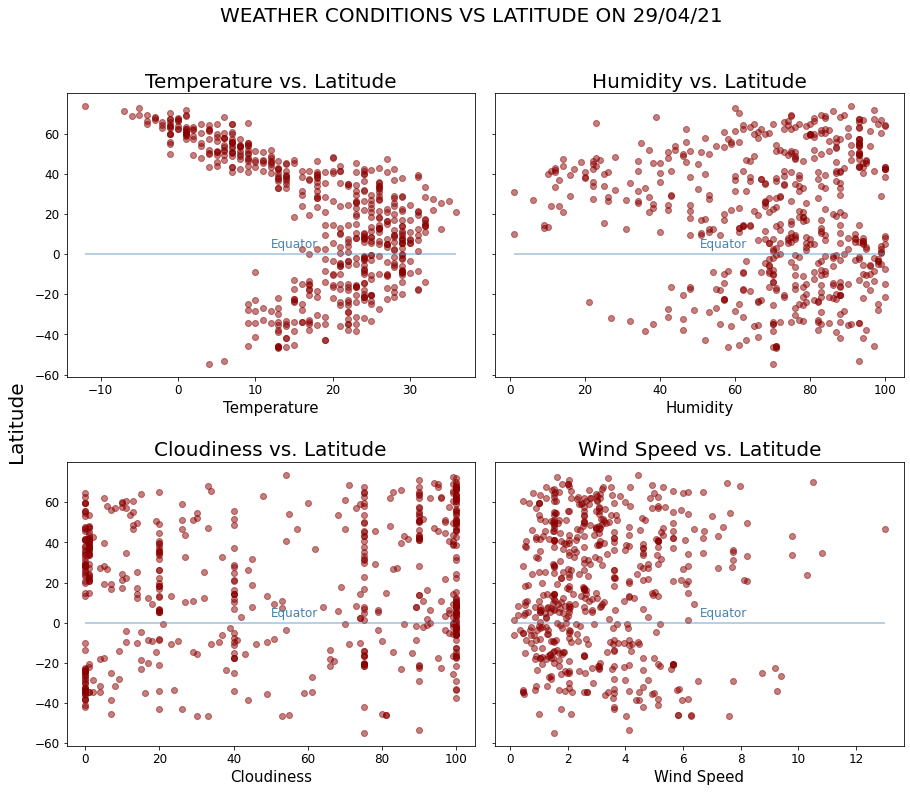

In [10]:
                # PLOTTING WEATHER CONDITIONS VS. LATITUDE USING A FOR LOOP   

fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(2,2, sharey='row', figsize=(15,12))    # Set up figure for subplots

plot_list = [ax0, ax1, ax2, ax3]                                # Set up list of plots to help with the for loop below

plt.subplots_adjust(hspace=.3, wspace=0.05)                     # Formatting        
fig.suptitle(f"WEATHER CONDITIONS VS LATITUDE ON {date}", ha='center', size=20)     # Set title for the whole figure

fig.text(.07, .5, "Latitude",           # Set label for shared y axis. This seemed to be
         va='center', rotation='vertical', fontsize=20,         # the easiest way. 
         linespacing = 2)  

for i in range (4):                                             # Aaaaaand.Here.We.Go!

    x_axis_name = master_plot_list[i]                           # Set name of x axis for the sake of labels
    x_axis = clean_weather_data_df[x_axis_name]                 # Set up x axis values 
    y_axis = clean_weather_data_df["Latitude"]      # Set up y axis values 

    slope, intercept, rvalue, pvalue, stderr = stats.linregress(x_axis, y_axis)  # Get elements of regression equation
    regress_values = x_axis * slope + intercept                 # Calculate regression values
              
    plot_list[i].set_xlabel(f"{x_axis_name}")                   # Set x axis label for subplot                  
    plot_list[i].set_title(f"{x_axis_name} vs. Latitude")       # Set title for subplot
    
    r = round(stats.pearsonr(x_axis, y_axis)[0],2)              # Calculate correlation coefficient
    rlabel = r_label(r)                                         # Call function to create a label for the r number

    plot_list[i].scatter(x_axis, y_axis, facecolors="darkred",  alpha=.5,)     # Plot the scatter chart
                                               
    plot_list[i].hlines(0, x_axis.min(), x_axis.max(), alpha=.5, color='steelblue')
    plot_list[i].annotate('Equator', ((x_axis.min()+x_axis.max())/2, 3), alpha=1, color='steelblue')
                                               
plt.savefig("output_data/weather-conditions-vs-latitude.png")                # Save the png file   

plt.show()


                                      CONCLUSIONS
As you can see from the charts above, the correlation between temperature and distance from the equator (i.e., positive and negative latitudes) is very strong, supporting the assertion that climates get warmer as you get closer to the equator. 

All other weather conditions (humidity, cloudiness and wind speed) have negligible correlations. 

In [11]:
#Create new dataframes for the Northern and Southern Hemisphere cities

north_hem_df = clean_weather_data_df.loc[clean_weather_data_df['Latitude'] > 0, ].reset_index(drop=True)

south_hem_df = clean_weather_data_df.loc[clean_weather_data_df['Latitude'] <= 0, ].reset_index(drop=True)

south_hem_df.head()

,City,Country Code,Latitude,Degrees From Equator,Longitude,Temperature,Humidity,Cloudiness,Wind Speed,Date
0,Kalemie,CD,-5.95,5.95,29.19,21.00,86.00,100.00,0.14,29/04/21
1,Mar Del Plata,AR,-38.00,38.00,-57.56,17.00,82.00,0.00,5.14,29/04/21
2,Saldanha,ZA,-33.01,33.01,17.94,11.00,82.00,0.00,3.60,29/04/21
3,Ancud,CL,-41.87,41.87,-73.82,14.00,94.00,0.00,4.63,29/04/21
4,Tautira,PF,-17.73,17.73,-149.15,31.00,62.00,40.00,1.03,29/04/21


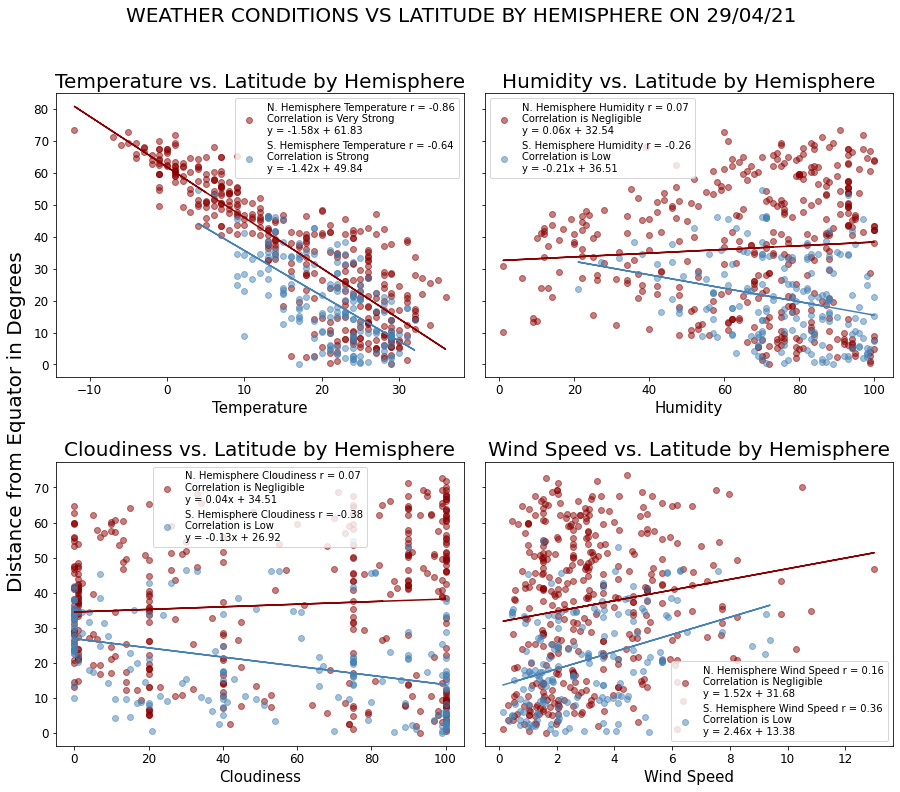

In [12]:
        # PLOTTING WEATHER CONDITIONS BY HEMISPHERE VS. LATITUDE USING A FOR LOOP

fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(2,2, sharey='row', figsize=(15,12))    # Set up figure for subplots

plot_list = [ax0, ax1, ax2, ax3]                               # Set up list of plots to help with the for loop below

plt.subplots_adjust(hspace=.3, wspace=0.05)                    # Formatting
fig.suptitle(f"WEATHER CONDITIONS VS LATITUDE BY HEMISPHERE ON {date}", 
             ha='center', size=20) # Set title for the whole figure

fig.text(.08, 0.5, "Distance from Equator in Degrees",         # Set label for shared y axis. This seemed to be         
         va='center', rotation='vertical', fontsize=20)

for i in range (4):   

        # Northern Hemisphere
    north_x_axis_name = master_plot_list[i]                           # Set name of x axis for the sake of labels
    north_x_axis = north_hem_df[north_x_axis_name]                    # Set up x axis values 
    north_y_axis = north_hem_df["Degrees From Equator"]               # Set up y axis values 

    slope, intercept, rvalue, pvalue, stderr = stats.linregress(north_x_axis, north_y_axis)  # Get elements of regression equation
    north_regress_values = north_x_axis * slope + intercept           # Calculate regression values

    north_r = round(stats.pearsonr(north_x_axis, north_y_axis)[0],2)  # Calculate correlation coefficient
    north_r_label = r_label(north_r)                                  # Call function to create a label for the r number                                
    north_line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Southern Hemisphere
    south_x_axis_name = master_plot_list[i]                           # Set name of x axis for the sake of labels
    south_x_axis = south_hem_df[south_x_axis_name]                    # Set up x axis values 
    south_y_axis = south_hem_df["Degrees From Equator"]               # Set up y axis values 
    
    slope, intercept, rvalue, pvalue, stderr = stats.linregress(south_x_axis, south_y_axis)  # Get elements of regression equation
    south_regress_values = south_x_axis * slope + intercept                 # Calculate regression values   
    
    south_r = round(stats.pearsonr(south_x_axis, south_y_axis)[0],2)  # Calculate correlation coefficient
    south_r_label = r_label(south_r)                                  # Call function to create a label for the r number
    
    # Formatting
    plot_list[i].set_xlabel(f"{north_x_axis_name}")                   # Set x axis label for subplot              
    plot_list[i].set_title(f"{north_x_axis_name} vs. Latitude by Hemisphere") # Set title for subplot 
    south_line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
        
    # Plotting
        # Northern Hemisphere
    plot_list[i].scatter(north_x_axis, north_y_axis, facecolors="darkred",  alpha=.5,     # Plot the scatter chart
        label=f"N. Hemisphere {north_x_axis_name} r = {north_r}\nCorrelation is {north_r_label}\n{north_line_eq}")                                                  

    plot_list[i].plot(north_x_axis, north_regress_values, color="darkred")         # Plot the regression line
    
        # Southern Hemisphere
    plot_list[i].scatter(south_x_axis, south_y_axis, facecolors="steelblue",  alpha=.5,   # Plot the scatter chart
        label=f"S. Hemisphere {south_x_axis_name} r = {south_r}\nCorrelation is {south_r_label}\n{south_line_eq}")                                                 

    plot_list[i].plot(south_x_axis, south_regress_values, color="steelblue")         # Plot the regression line    
       
    plot_list[i].legend(fontsize=10)                                   # Add the legend
    
plt.savefig("output_data/weather-conditions-vs-latitude-by-hemisphere.png")        # Save the png file   

plt.show()


                                                    CONCLUSIONS
This analysis by hemisphere doesn't change the initial results. Temperature is still the only weather variable that has a strong correlation to latitude, although on several random samples, the correlation is a little stronger in one hemisphere than the other. 